In [1]:
#Install and imports
!pip install torch torchvision trdg
!pip install Pillow==9.5.0
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


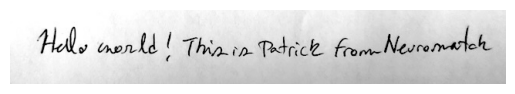

In [2]:
# Path to the image
image_path = '../static/img_1235.jpg'

# Open the image
image = Image.open(image_path)
if image.mode != 'RGB':
    image = image.convert('RGB')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


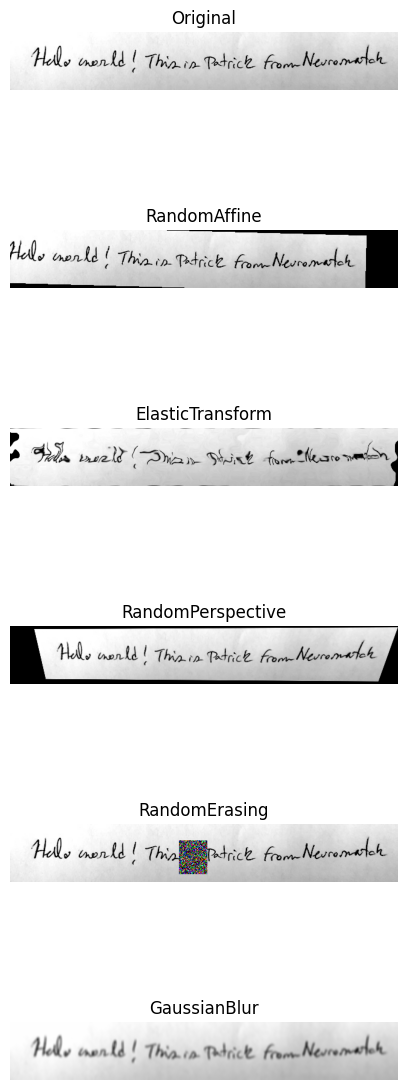

In [3]:
# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image = to_tensor(image)

# Define each transformation separately
# RandomAffine: applies rotations, translations, scaling. Here, rotates by up to ±15 degrees,
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))

# ElasticTransform: applies elastic distortions to the image. The 'alpha' parameter controls
# the intensity of the distortion.
elastic = transforms.ElasticTransform(alpha=50.0)

# RandomPerspective: applies random perspective transformations with a specified distortion scale.
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)

# RandomErasing: randomly erases a rectangle area in the image.
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)

# GaussianBlur: applies gaussian blur with specified kernel size and sigma range. 
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.4, 5))

# A list of all transformations for iteration
transformations = [affine, elastic, perspective, erasing, gaussian_blur]

# Vertical stacking of transformations
fig, axs = plt.subplots(len(transformations) + 1, 1, figsize=(5, 15))  

# Permute the image dimensions from (C, H, W) to (H, W, C) for display
display_image = image.permute(1, 2, 0)

axs[0].imshow(display_image)
axs[0].set_title('Original')
axs[0].axis('off')

for i, transform in enumerate(transformations, 1):
    augmented_image = transforms.Compose([transform])(image)
    # Permute the augmented image dimensions from (C, H, W) to (H, W, C) for display
    display_augmented = augmented_image.permute(1, 2, 0)

    axs[i].imshow(display_augmented)
    axs[i].set_title(transform.__class__.__name__)
    axs[i].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


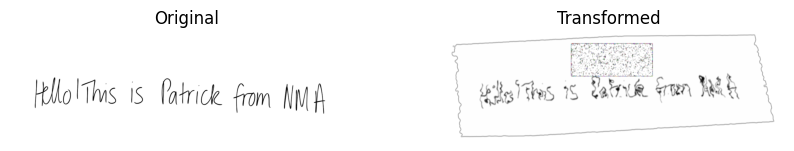

In [4]:
# Path to the image
image_path = '../static/image_augmentation.png'

# Open the image
image = Image.open(image_path)

# Convert PIL Image to Tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image)

# Define your transformations here
affine = transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))
elastic = transforms.ElasticTransform(alpha=90.0)
perspective = transforms.RandomPerspective(distortion_scale=0.2, p=1.0)
erasing = transforms.RandomErasing(p=1, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random', inplace=False)
gaussian_blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))

# Combine all the transformations
all_transforms = transforms.Compose([
    affine,
    elastic,
    perspective,
    erasing,
    gaussian_blur
])

# Apply combined transformation
augmented_image_tensor = all_transforms(image_tensor)

# Set up matplotlib subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[0].set_title('Original')
axs[0].axis('off')

# Display augmented image
axs[1].imshow(augmented_image_tensor.permute(1, 2, 0))  # Change to (H, W, C) for display
axs[1].set_title('Transformed')
axs[1].axis('off')

plt.show()


Missing modules for handwritten text generation.


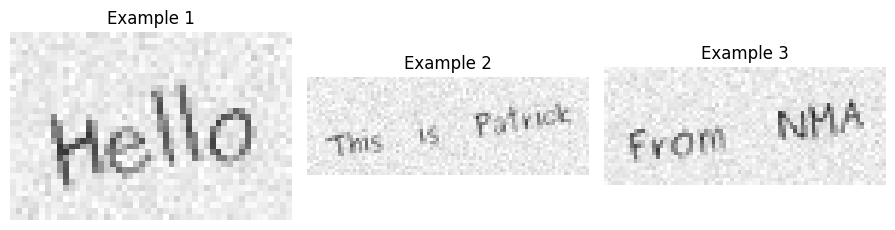

In [5]:
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt

# Define your strings
strings = ['Hello', 'This is Patrick', 'From NMA']  # Update this list as needed

# Create a generator with the specified font
generator = GeneratorFromStrings(
    strings,
    space_width=2,
    skewing_angle=8,
    count=3,  # number of images to generate
    fonts=['Purisa']  # Update or add more fonts as needed
)

# Setup matplotlib figure and display images
plt.figure(figsize=(15, 3))
for i, (text_img, lbl) in enumerate(generator, 1):
    ax = plt.subplot(1, 5, i)  # Adjust the number of subplots if needed
    plt.imshow(text_img)
    plt.title(f"Example {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
from IPython.display import IFrame

IFrame("https://www.calligrapher.ai/", width=800, height=600)